In [3]:
import numpy as np
import pandas as pd
import pickle
import seaborn as sns
from sklearn.linear_model import LinearRegression
import patsy

In [4]:
auto_mpg = pd.read_csv('data/auto-mpg.csv')

## Data Preparation

In [5]:
auto_mpg = auto_mpg[auto_mpg.horsepower != "?"]
auto_mpg.horsepower = auto_mpg.horsepower.astype(float)
auto_mpg['age'] = 83 - auto_mpg['model year']
country_dict = {1:'EUA', 2:'Europe', 3:'Japan'}
auto_mpg.origin = auto_mpg.origin.map(country_dict)
dummies = pd.get_dummies(auto_mpg.origin, drop_first=True)
auto_mpg = pd.concat([auto_mpg, dummies], axis=1)
auto_mpg['mpgl'] = np.log(auto_mpg.mpg)

In [6]:
y, X = patsy.dmatrices('mpgl ~ age + weight + Japan + Europe', auto_mpg, return_type='dataframe')

## Model 3

In [7]:
model3 = LinearRegression(fit_intercept=False).fit(X,y)
y_pred = model3.predict(X)

In [8]:
model3.coef_

array([[ 4.15119697e+00, -3.18941720e-02, -2.86392383e-04,
         5.74966684e-02,  7.03073885e-02]])

In [9]:
np.mean((y - y_pred)**2)

c:\Anaconda\envs\nlp\lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


mpgl    0.014288
dtype: float64

In [12]:
y_pred = pd.DataFrame(y_pred, columns = ['y_pred'])
results = pd.concat([y, y_pred], axis=1)

<AxesSubplot: xlabel='mpgl', ylabel='y_pred'>

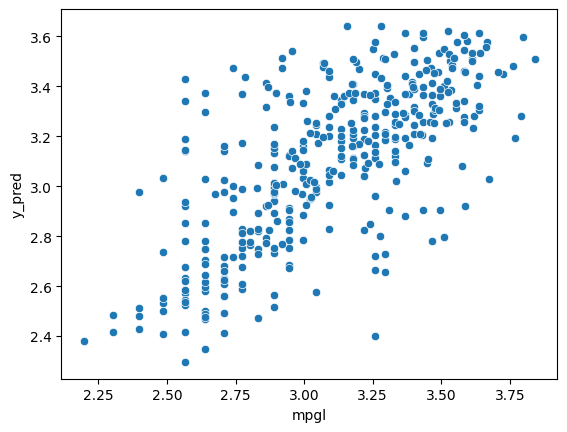

In [13]:
sns.scatterplot(data=results, x="mpgl", y="y_pred")

In [14]:
with open('model3.pickle','wb') as f:
    pickle.dump(model3, f)

In [19]:
with open('model3.pickle', 'rb') as f:
  model3 = pickle.load(f)

In [49]:
def predict_mpgl(model, new_data):
    # Predict diabetes
    predictions = model.predict(new_data)

    #pred_to_label = {0: 'Negative', 1: 'Positive'}

    # Make a list of predictions
    data = []
    for t, pred in zip(new_data, predictions):
        data.append({'prediction': pred[0]})

    return data

if __name__=="__main__":
    # Sample to classify should be in a list.
    new_sample = np.array([[1, 13, 3504, 0, 0], [1, 13, 3504, 0, 0]])
    new_sample = new_sample
    predictions = predict_mpgl(model3, new_sample)
    print(predictions)

[{'prediction': 2.7330538243888323}, {'prediction': 2.7330538243888323}]


c:\Anaconda\envs\nlp\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
